# Profitable Mobile Apps

The aims of this projects is to help the developers understand what type of apps are likely to attract more users on Google Play. Dataset used in this project contains around 10,000 samples, that was collected in August 2018.



Import the required libraries

In [1]:
from csv import reader
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

Read the dataset

In [2]:
file = open('dataset/playstore.csv', encoding='utf8')
read_file = reader(file)
dataset_playstore = list(read_file)

Create a function for data exploration

In [3]:
def explore_data(dataset, start, end, rows_and_columns=False):
    """
    explore_data to to explore each row in the dataset.
    
    :start: starting indices
    :end: ending indices
    :rows_and_columns: print number of rowws and columns if True (default: False)
    """
    
    dataset_slice = dataset[start:end]
    for row in dataset_slice:
        print(row)

    if rows_and_columns:
        print('Number of rows :', len(dataset[1:]))
        print('Number of columns:', len(dataset[0]))


Explore the playstore dataset using the "explore_data" function

In [4]:
explore_data(dataset_playstore, 0, 10, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']
['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']
['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']
['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']
['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Everyone', 'A

### Data cleaning

At the data cleaning stage, we will ensure that the data prepared for analysis is correct and accurate to avoid errors in the analysis. What we are looking for is:

* Removing incorrect data
* Removing duplicate app entries
* Removing non-English apps
* Removing the paid apps

First, we check the incorrect data by printing the row that has a length that is not the same as the header

In [5]:
index_length = len(dataset_playstore[0])

for item in dataset_playstore[1:]:
    row_length = len(item)
    if row_length != index_length:
        print(item)
        print(dataset_playstore.index(item))

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']
10473


From the results above, it is known that in the Playstore dataset there is an incorrect data, it has a missing value, namely the index [10473]. Therefore, we run the del function (Run only once, if it repeats it will delete other data)

In [6]:
del(dataset_playstore[10473])

The next step is to separate the unique and duplicate data

In [7]:
duplicate_apps = []
unique_apps = []

for item in dataset_playstore[1:]:
    name = item[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)


In [8]:
print('Number of duplicate apps :', len(duplicate_apps))

Number of duplicate apps : 1181


Next we will delete duplicate apps, from each duplicate apps we only choose apps that have the highest number of reviews to maintain

In [9]:
highest_review = {}

for item in dataset_playstore[1:]:
    name = item[0]
    n_reviews = float(item[3])

    if name in highest_review and highest_review[name] < n_reviews:
        highest_review[name] = n_reviews
    elif name not in highest_review:
        highest_review[name] = n_reviews

In [10]:
playstore_clean = []
already_added = []

for item in dataset_playstore[1:]:
    name = item[0]
    n_reviews = float(item[3])

    if n_reviews == highest_review[name] and name not in already_added:
        playstore_clean.append(item)
        already_added.append(name)

In [11]:
len(playstore_clean)

9659

After the duplicated apps is deleted, the remaining data is 9659 rows.

Create a function to check non-english applications, if there are more than 3 non-english characters, they will be removed (set threshold to three character so that apps that using emojis is not deleted)

In [12]:
def check_non_english(input):
    counter = 0
    for character in input:
        check_non_english = ord(character)
        if check_non_english > 127:
            counter +=1
    if counter > 3:
        return True
    else:
        return False

print(check_non_english('Instagram'))
print(check_non_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(check_non_english('Docs To Go™ Free Office Suite'))
print(check_non_english('Instachat 😜'))

False
True
False
False


Removing the english and non english apps

In [13]:
playstore_eng = []
playstore_non_eng = []

for item in playstore_clean:
    check_english = check_non_english(item[0])
    if check_english == True:
        playstore_non_eng.append(item)
    else:
        playstore_eng.append(item)
        

Removing the free and paid apps

In [14]:
playstore_free = []
playstore_paid = []

for item in playstore_eng:
    if item[6] != 'Free':
        playstore_paid.append(item)
    else:
        playstore_free.append(item)

Create a function to generate a frequency table

In [15]:
def freq_table(dataset, index):
    frequency = {}
    frequency_percentage = {}
    n_data = 0
    
    for item in dataset:
        n_data += 1
        frequency_counter = item[index]
        if frequency_counter in frequency:
            frequency[frequency_counter] += 1
        else:
            frequency[frequency_counter] = 1
    
    for item in frequency:
        percentage = round((frequency[item] / n_data) * 100, 2)
        frequency_percentage[item] = percentage
        
    return frequency_percentage

def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    return table_sorted


Generate frequency for category

In [16]:
frequency_category = display_table(playstore_free, 1)

category = []
n_category = []

for item in frequency_category:
    category.append(item[1])
    n_category.append(item[0])

Visualize the category frequency

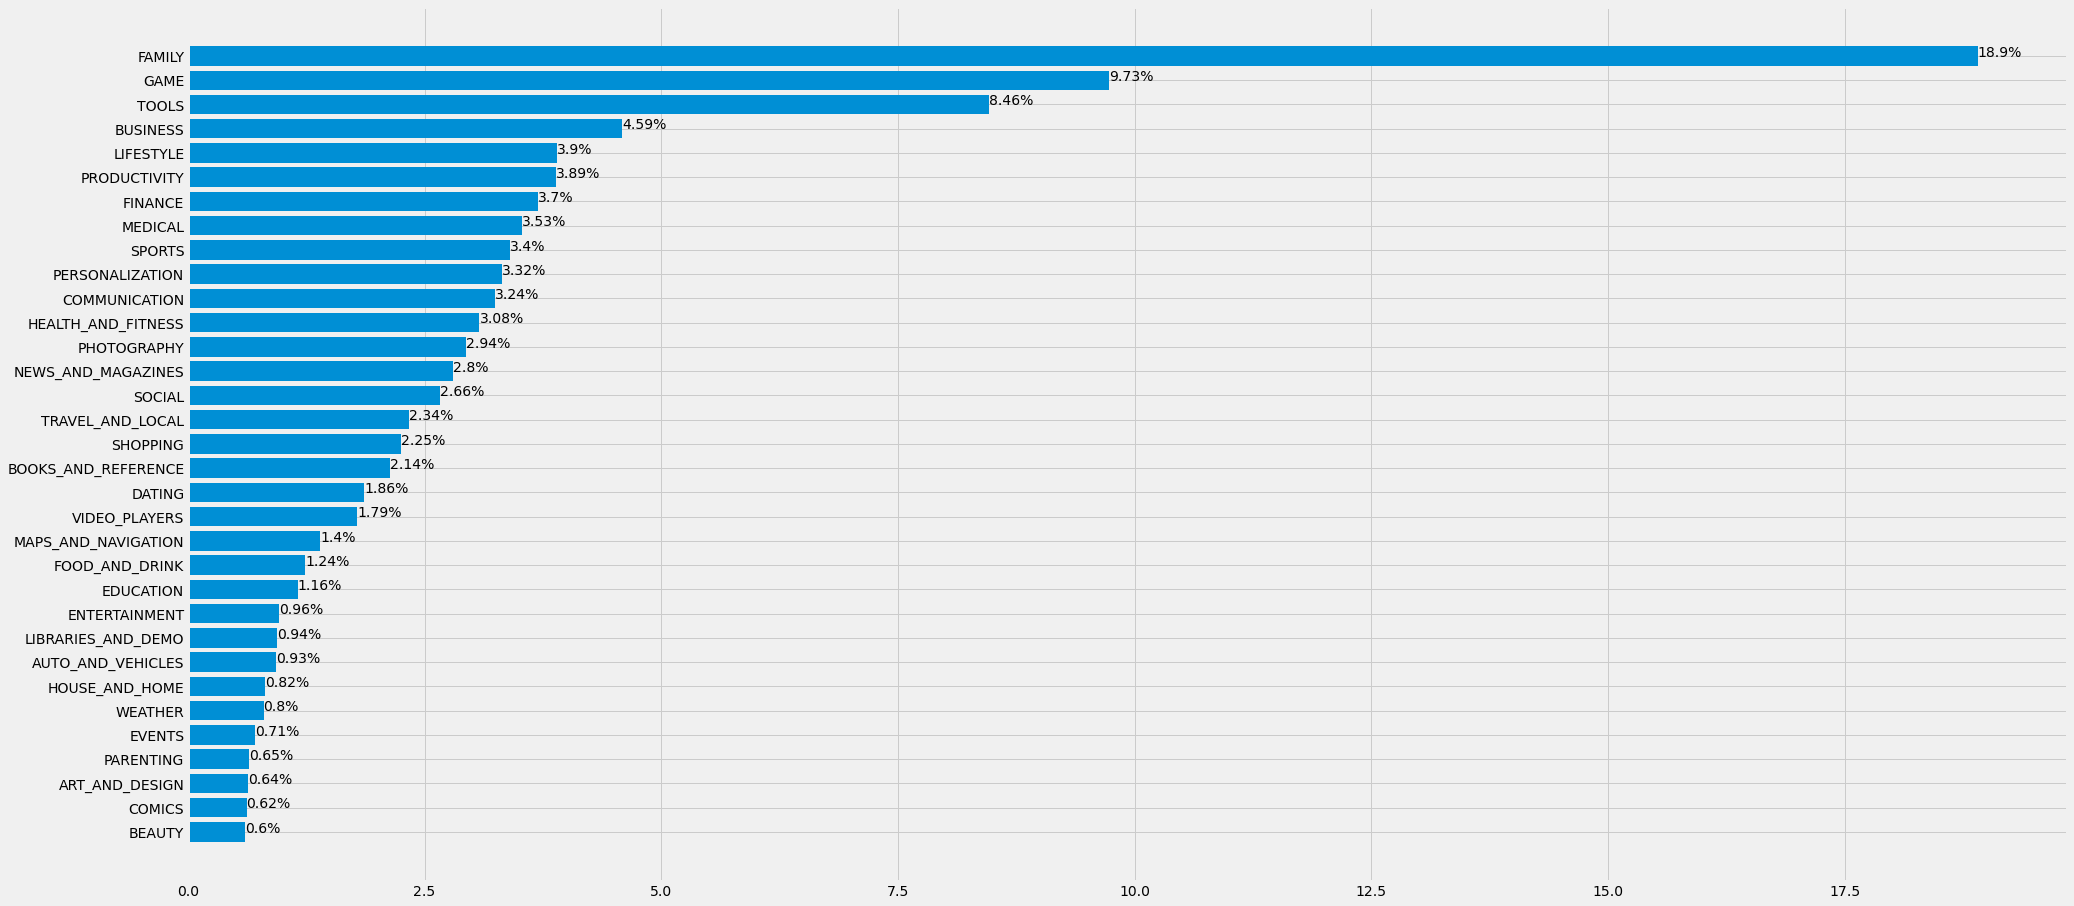

In [17]:
plt.figure(figsize=(30, 15))
plt.barh(category, n_category)
for index, value in enumerate(n_category):
    plt.text(value, index, str(value) + '%')
plt.gca().invert_yaxis()
plt.show()

Based on the chart above, it is known that the three most common categories on the Play Store are 'FAMILY', 'GAME', and 'TOOLS', respectively.

Generate the frequency for genre

In [18]:
frequency_genres = display_table(playstore_free, 9)

In [19]:
genres = []
n_genres = []

for item in frequency_genres[0:30]:
    genres.append(item[1])
    n_genres.append(item[0])

Visualize the genre frequency

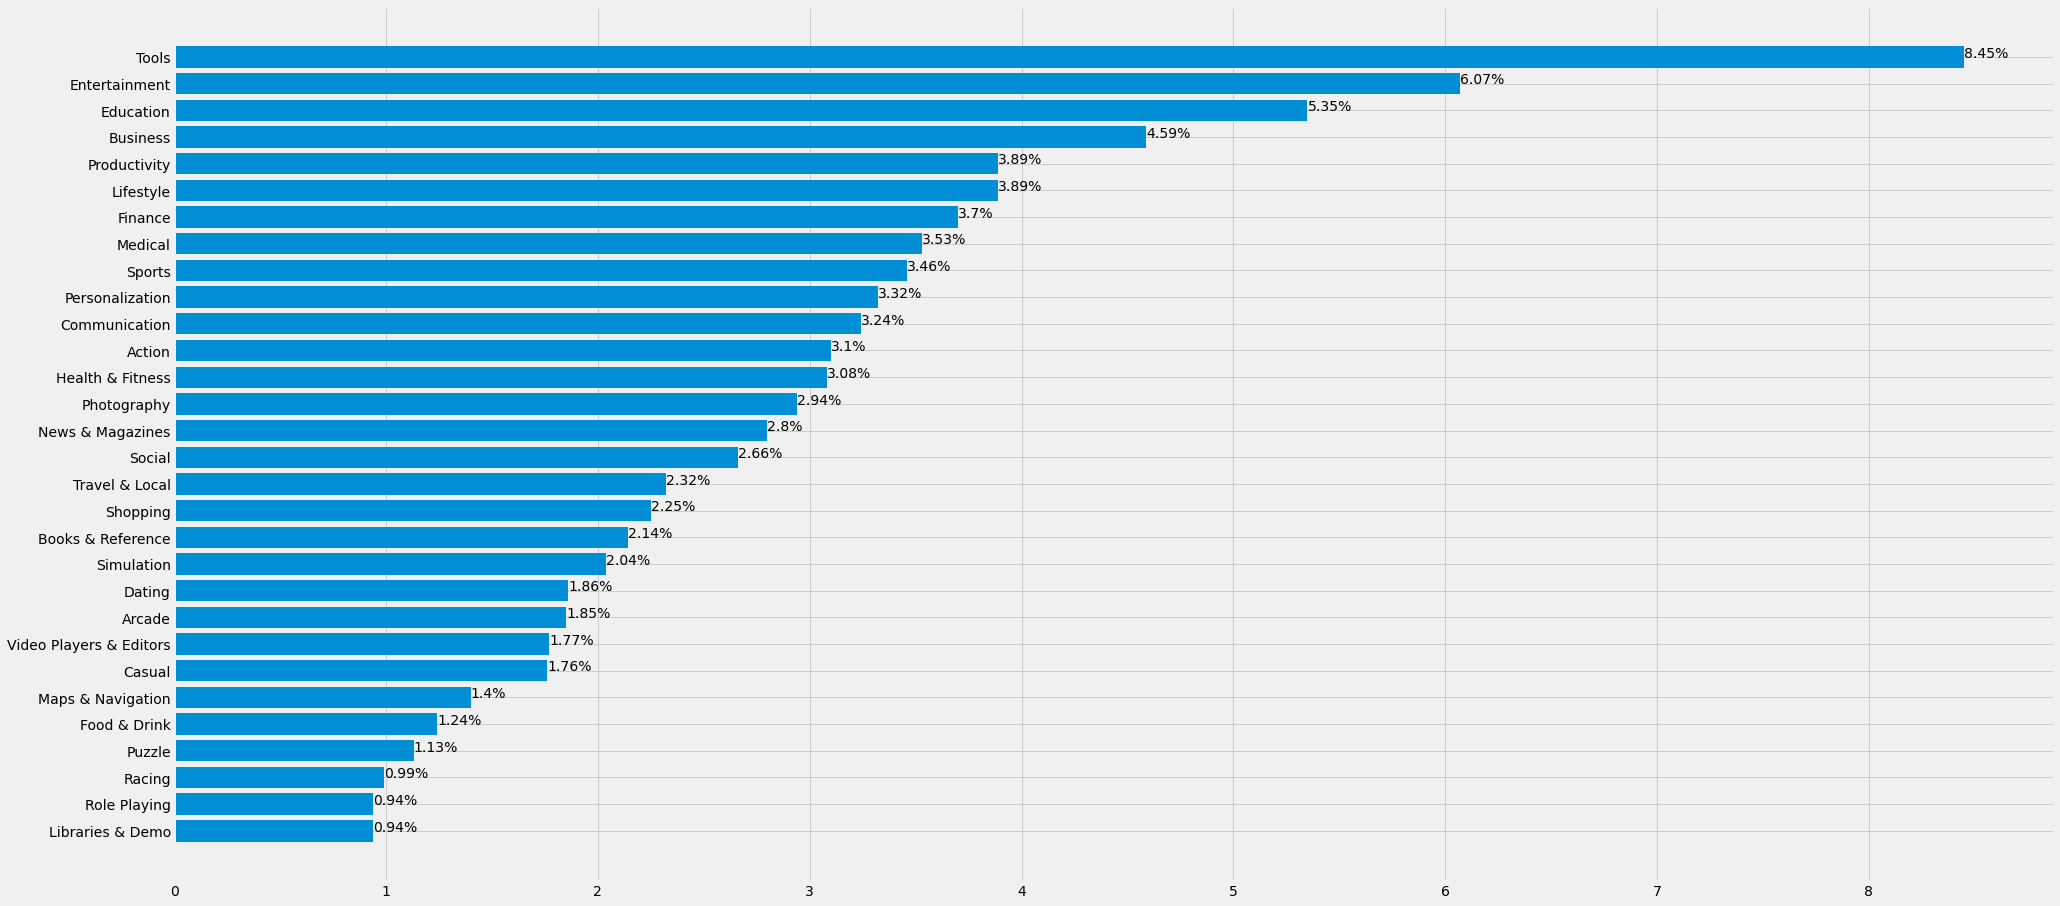

In [20]:
plt.figure(figsize=(30, 15))
plt.barh(genres, n_genres)
for index, value in enumerate(n_genres):
    plt.text(value, index, str(value) + "%")
plt.gca().invert_yaxis()
plt.show()

Based on the chart above, it is known that the three most common categories on the Play Store are 'Tools', 'Entertainment', and 'Education', respectively.

Next, we will find out what categories are the most popular, by calculating the average value of the number of users who install apps in that category.

In [21]:
categories = freq_table(playstore_free, 1)

popular_apps = {}
for category in categories:
    total = 0
    len_category = 0
    
    for app in playstore_free:
        category_app = app[1]
        if category_app == category:            
            n_installs = app[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            len_category += 1
    avg_n_installs = total / len_category
    popular_apps[category] = round(avg_n_installs)
    
sorted_popular_apps = dict(sorted(popular_apps.items(), key=lambda x: x[1], reverse=True))
    

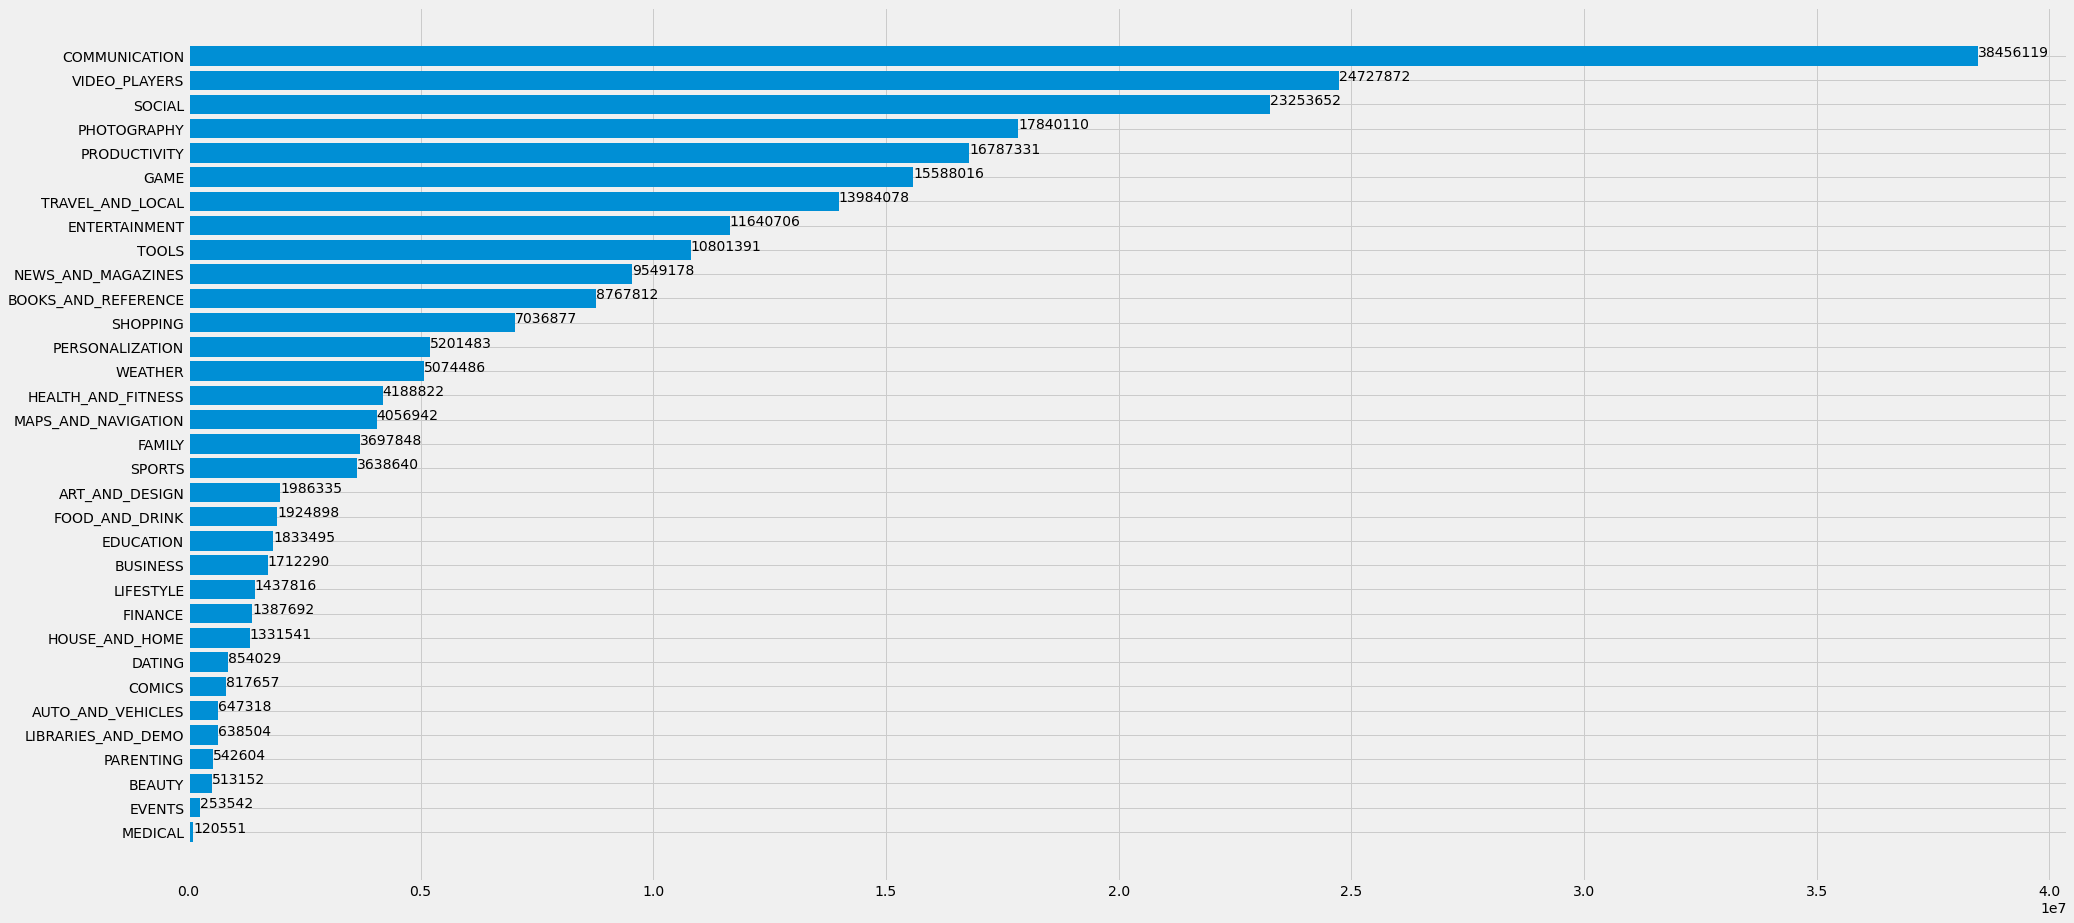

In [22]:
plt.figure(figsize=(30, 15))
plt.barh(list(sorted_popular_apps.keys()), list(sorted_popular_apps.values()))
for index, value in enumerate(list(sorted_popular_apps.values())):
    plt.text(value, index, str(value))
plt.gca().invert_yaxis()
plt.show()

## Conclusion

In this project, we have analyzed the most profitable mobile apps in Google Play. We cleaned the data by removing incorrect, duplicated, and non-English app entries. 

Our analysis showed that the three most common categories in Play Store are FAMILY, GAMES, and TOOLS apps. But, based on the popularity that we find out by calculating the average 
value of the number of users who install apps in that category, the top three most popular categories are COMMUNICATION, VIDEO_PLAYERS, and SOCIAL apps, and we recommend this category because
its shows potential for being profitable in Play Store.